# <center><font color='RED'>**CAT Reloaded Data Science**</center></font>
<center>```Beginner's task 4 (Pandas Continued)```</center>



# <font color='darkgreen'> **Download Dataset**
### [**survey_results_public_Dataset**](https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2019.zip)

### 1. Show your data after sorting it (descendingly by `Country`) & (ascendingly by `SocialMedia`) :

In [3]:
# sort data here:
import pandas as pd
df = pd.read_csv('survey_results_public.csv')
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',85)
df.sort_values(by=['Country','SocialMedia'],ascending=[False,True])


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
249,251,I am a student who is learning to code,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",Zimbabwe,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,Academic researcher;Database administrator;Des...,5,15,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Industry that I'd be working in;Languages, fra...","Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;C++;C#;HTML/CSS;JavaScript;Python;VBA,Clojure;Java;PHP,Microsoft SQL Server;MySQL,Firebase;Microsoft SQL Server;Oracle;SQLite,Linux,Android;Google Cloud Platform;iOS;MacOS;Micros...,ASP.NET;jQuery,NaN,.NET;Node.js,.NET Core;Unity 3D,NetBeans;Notepad++;Visual Studio,Windows,"Development;Outside of work, for personal proj...",NaN,Useful for immutable record keeping outside of...,Yes,Yes,Yes,WhatsApp,In real life (in person),UserID,2017,A few times per week,Get a sense of belonging to the developer comm...,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are","Yes, somewhat",A lot more welcome now than last year,Tech meetups or events in your area;Courses on...,20.0,Man,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Neither easy nor difficult
159,161,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,Viet Nam,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,Taken an online course in programming or softw...,10 to 19 employees,"Developer, back-end;Developer, front-end;Devel...",11,22,10,Very satisfied,Slightly satisfied,NaN,NaN,NaN,I am actively looking for a job,1-2 years ago,"Write code by hand (e.g., on a whiteboard);Com...",No,Financial performance or funding status of the...,I was preparing for a job search,VND,Vietnamese dong,85000000.0,Monthly,43956.0,48.0,There is a schedule and/or spec (made by me or...,Meetings;Time spent commuting;Toxic work envir...,A few days each month,Home,Far above average,"Yes, because I see value in code review",7.0,"No, but I think we should",Not sure,I have a great deal of influence,HTML/CSS;JavaScript;PHP,Go;HTML/CSS;JavaScript;PHP,Elasticsearch;MariaDB;MySQL;Redis,Elasticsearch;MariaDB;MySQL;Redis,AWS;Linux;MacOS;WordPress,AWS;Docker;Kubernetes;Linux;MacOS;Slack,jQuery;Laravel,jQuery;Laravel,NaN,NaN,NetBeans;Notepad++;PHPStorm;Sublime Text,MacOS,Development;Testing;Production,Accepting Bitcoin or other coins and tokens as...,NaN,No,Also Yes,No,YouTube,Online,Screen Name,2015,Daily or almost daily,Find answers to specific questions,6-10 times per week,They were about the same,NaN,Yes,Daily or almost daily,"No, I knew that Stack Overflow had a j

___________________________________________________________________________________________

### Group the dateframe by `Country` for the following questions:



In [4]:
country_grp=df.groupby(['Country'])

### 1. Show value counts for `Student` in the `United Kingdom`

#### a. How many are full-time students ?
#### b. How many are not students ?

In [5]:
country_grp['Student'].value_counts().loc['United Kingdom']

Student
No                49
Yes, full-time     9
Yes, part-time     2
Name: Student, dtype: int64

In [ ]:
# 9 students

In [ ]:
# 49 are not student

### 2. What's the median sallary `ConvertedComp` for developers in `Germany`,  `Italy`, `Finland`

In [6]:
country_grp['ConvertedComp'].median().loc['Germany']

65308.0

In [7]:
country_grp['ConvertedComp'].median().loc['Italy']

26810.5

In [8]:
country_grp['ConvertedComp'].median().loc['Finland']

57744.0

### 3. Show the number of respondents from each country

In [9]:
country_respondents= df['Country'].value_counts()
country_respondents

United States     238
India              83
United Kingdom     60
Germany            53
Canada             40
                 ... 
Cambodia            1
Viet Nam            1
Belarus             1
Guatemala           1
Burundi             1
Name: Country, Length: 86, dtype: int64

### 4. Show the number of respondents that worked with `Android` from each country mentioned in column `PlatformWorkedWith`

In [10]:
country_worked_android =country_grp['PlatformWorkedWith'].apply(lambda x:x.str.contains('Android').sum())
country_worked_android

Country
Afghanistan              0
Antigua and Barbuda      0
Argentina                0
Armenia                  0
Australia                3
                        ..
United Arab Emirates     0
United Kingdom          10
United States           38
Viet Nam                 0
Zimbabwe                 0
Name: PlatformWorkedWith, Length: 86, dtype: int64

### 5. the function **`pandas.concat()`** to add these two series together in a new DataFrame

In [11]:
new_data = pd.concat([country_worked_android,country_respondents], axis='columns')
new_data

,PlatformWorkedWith,Country
Afghanistan,0,1
Antigua and Barbuda,0,1
Argentina,0,7
Armenia,0,1
Australia,3,27
...,...,...
United Arab Emirates,0,4
United Kingdom,10,60
United States,38,238
Viet Nam,0,1


### 6. Add a new column contains the percentage of people that worked with `Android` from each country

In [12]:
new_data['Pct_worked_android'] = (new_data['PlatformWorkedWith']/new_data['Country']) * 100
new_data

,PlatformWorkedWith,Country,Pct_worked_android
Afghanistan,0,1,0.000000
Antigua and Barbuda,0,1,0.000000
Argentina,0,7,0.000000
Armenia,0,1,0.000000
Australia,3,27,11.111111
...,...,...,...
United Arab Emirates,0,4,0.000000
United Kingdom,10,60,16.666667
United States,38,238,15.966387
Viet Nam,0,1,0.000000


### 7. Tell the difference between the following two cells:
> **`hint`**: what does each cell do

In [13]:
sorted_data = df[["Country" , "ConvertedComp"]].sort_values(by=["Country" , "ConvertedComp"], ascending = [True,False])
sorted_data.head(50)

,Country,ConvertedComp
719,Afghanistan,0.0
10,Antigua and Barbuda,NaN
179,Argentina,84000.0
660,Argentina,58140.0
145,Argentina,17280.0
580,Argentina,16152.0
32,Argentina,8400.0
360,Argentina,6168.0
58,Argentina,648.0
710,Armenia,NaN


In [14]:
grouped_data = df[["Country" , "ConvertedComp"]].groupby('Country').agg({"ConvertedComp":"median"})
grouped_data.head(50)

,ConvertedComp
Country,
Afghanistan,0.0
Antigua and Barbuda,NaN
Argentina,16152.0
Armenia,NaN
Australia,68320.5
Austria,49974.0
Azerbaijan,NaN
Bahrain,NaN
Bangladesh,22938.0


In [ ]:
# Tell the difference here:
#the first one --> this line will sort the two column Country and ConvertedComp the country in ascending order and the convertedcomp in descending order
#the second one --> This code  is selecting two columns, "Country" and "ConvertedComp", from a dataFrame called df. It then groups the data by the "Country" column and calculates the median of the "ConvertedComp" column for each group. Finally, it aggregates these results into a new DataFrame called grouped_data.

### 1. remove nan values

In [15]:
#write code
df.dropna()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
19,20,"I am not primarily a developer, but I write co...",No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Lithuania,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",Taken an online course in programming or softw...,"1,000 to 4,999 employees","Database administrator;Designer;Developer, bac...",8,17,4,Very satisfied,Slightly dissatisfied,Very confident,No,I am already a manager,"I’m not actively looking, but I am open to new...",More than 4 years ago,Interview with people in peer roles;Interview ...,No,Remote work options;How widely used or impactf...,"My job status changed (promotion, new job, etc.)",EUR,European Euro,3000.0,Monthly,41244.0,140.0,There's no schedule or spec; I work on what se...,Lack of support from management;Non-work commi...,"More than half, but not all, the time",Office,A little above average,"Yes, because I see value in code review",1.0,"No, but I think we should",Developers typically have the most influence o...,I have a great deal of influence,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Elasticsearch;MariaDB;MongoDB;Microsoft SQL Se...,Elasticsearch;MariaDB;MongoDB;Microsoft SQL Se...,Android;Docker;Windows;WordPress,Android;Docker;Windows,Angular/Angular.js;ASP.NET;jQuery,Angular/Angular.js;ASP.NET;jQuery,.NET;Pandas,.NET;Pandas;Unity 3D;Xamarin,Android Studio;Visual Studio;Visual Studio Code,Windows,"Outside of work, for personal projects",Not at all,Useful for immutable record keeping outside of...,Yes,Also Yes,Yes,Facebook,In real life (in person),Username,2010,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,I have never participated in Q&A on Stack Over...,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Not applicable - I did not use Stack Overflow ...,Tech articles written by other developers,38.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
38,39,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Database administrator;Developer, back-end;Dev...",30,6,23,Very satisfied,Very satisfied,Somewhat confident,No,No,"I’m not actively looking, but I am open to new...",More than 4 years ago,"Write any code;Write code by hand (e.g., on a ...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,156000.0,Yearly,156000.0,50.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Distrac...,Less than once per month / Never,Office,A little above average,"Yes, beca

### 2. make sure there is not nan values

In [16]:
#write code
df.isna()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,True,True,True,True,True,False,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

### 3. clean `Age` Column
> **`hint:`** use .unique() and .replace()

In [17]:
# write code

#df['Age'].replace('nan',df['Age'].median(),inplace=True)

df['Age'] = df['Age'].replace('', pd.NA)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].fillna(df['Age'].median() , inplace=True)
df['Age'].unique()


array([14. , 19. , 28. , 22. , 30. , 42. , 24. , 23. , 29. , 21. , 31. ,
       20. , 26. , 38. , 47. , 34. , 32. , 25. , 17. , 35. , 27. , 44. ,
       43. , 62. , 37. , 45. , 18. , 33. , 36. , 16. , 39. , 64. , 41. ,
       54. , 49. , 40. , 56. , 12. , 58. , 46. , 59. , 51. , 48. , 57. ,
       52. , 50. , 23.9, 55. , 15. , 67. , 13. ,  1. ])

### 4. Save your dataFrame into `xlsx` file and name it `My_excel_file` (search for that):


In [18]:
# save your .xlsx file
df.to_excel('My_excel_file.xlsx')


_________________________________________________________

# <font color='darkgreen'> **Dates and Time Series Data**
### [**Dataset**](https://drive.google.com/file/d/1IT8MVAvGnEyOcoBIy2NesBkhfDODcs1I/view?usp=share_link)

### 1. Here, I tried to **resample my data by "M" (Month)** to get the median ticket-price for each month. but I got an error at the **second cell**.

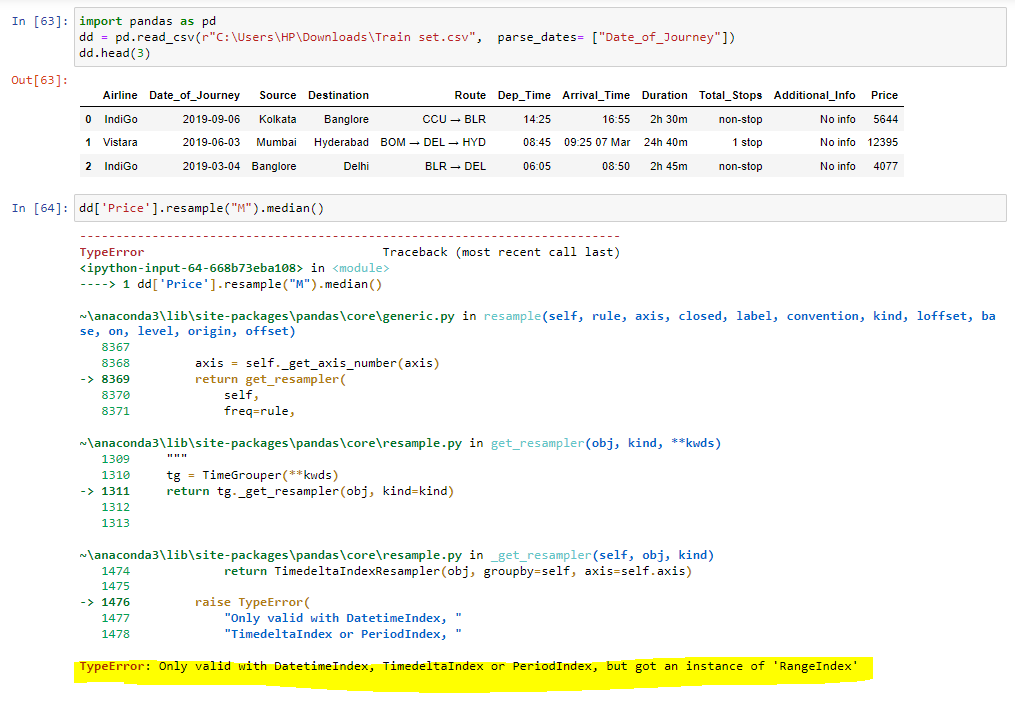

In [21]:
# Write a code to fix the above error :(

import pandas as pd
from datetime import datetime
df = pd.read_csv('Train set.csv')
df['Date_of_Journey'] = df['Date_of_Journey'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
df.set_index('Date_of_Journey', inplace=True)
df['Price'].resample('M').median()


Date_of_Journey
2019-03-31    9536.0
2019-04-30    5117.0
2019-05-31    8802.0
2019-06-30    8665.5
Freq: M, Name: Price, dtype: float64

### 2. Create a new column named `Day_week` to store the day of the week for each row of the data like the following:

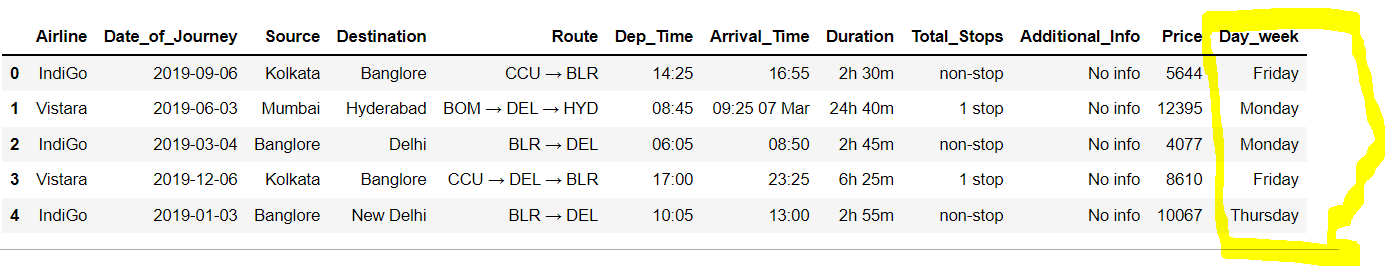

In [22]:
# Create Your Column here:
df.reset_index(inplace=True)
df['Day_week']=df['Date_of_Journey'].dt.day_name()
df

,Date_of_Journey,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_week
0,2019-06-09,IndiGo,Kolkata,Banglore,CCU → BLR,14:25,16:55,2h 30m,non-stop,No info,5644,Sunday
1,2019-03-06,Vistara,Mumbai,Hyderabad,BOM → DEL → HYD,08:45,09:25 07 Mar,24h 40m,1 stop,No info,12395,Wednesday
2,2019-04-03,IndiGo,Banglore,Delhi,BLR → DEL,06:05,08:50,2h 45m,non-stop,No info,4077,Wednesday
3,2019-06-12,Vistara,Kolkata,Banglore,CCU → DEL → BLR,17:00,23:25,6h 25m,1 stop,No info,8610,Wednesday
4,2019-03-01,IndiGo,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
8007,2019-05-24,IndiGo,Delhi,Cochin,DEL → BOM → COK,18:35,01:30 25 May,6h 55m,1 stop,No info,7503,Friday
8008,2019-05-06,IndiGo,Mumbai,Hyderabad,BOM → HYD,09:10,10:40,1h 30m,non-stop,No info,4049,Monday
8009,2019-04-09,Air Asia,Kolkata,Banglore,CCU → BBI → BLR,06:50,10:30,3h 40m,1 stop,No info,5162,Tuesday
8010,2019-03-21,SpiceJet,Chennai,Kolkata,MAA → CCU,09:30,12:05,2h 35m,non-stop,No check-in baggage included,3332,Thursday


### 3. Save your dataFrame into `csv` file and name it `My_csv_file` (search for that):



In [23]:
# save data into .csv
df.to_excel('My_excel_file.xlsx')


# **2. LeetCode Problems** 💡


<a href='https://leetcode.com/problems/intersection-of-two-arrays/description/?envType=daily-question&envId=2024-03-10'> <font color='blue'>**Problem 1** (Intersection of Two Arrays)</a> </font>

In [ ]:
#https://leetcode.com/problems/intersection-of-two-arrays/submissions/1203362204/?envType=daily-question&envId=2024-03-10